<a href="https://colab.research.google.com/github/naufalmnph/UAS-Analitika_M-Naufal-Putra-Hadi_3333210109/blob/main/UAS_M_Naufal_Putra_Hadi_3333210109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

Import library yang digunakan

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

import dataset yang sudah diupload pada google drive menggunakan perintah gdown

In [98]:
# https://drive.google.com/file/d/1PKLKi9n9tRW6Kqbl-LoVxLWKQ0qsrRn9/view?usp=sharing

!gdown 1PKLKi9n9tRW6Kqbl-LoVxLWKQ0qsrRn9

Downloading...
From: https://drive.google.com/uc?id=1PKLKi9n9tRW6Kqbl-LoVxLWKQ0qsrRn9
To: /content/FB.csv
100% 182k/182k [00:00<00:00, 119MB/s]


Kumpulan data ini memberikan riwayat harga harian saham Facebook. Data dimulai dari 18-Mei-2012 hingga 24-Maret-2022. Semua deskripsi kolom disediakan. Mata uang adalah USD.

Menampilkan data yang sudah berhasil di import dan menampilkan 5 baris pertama dengan  train data head

In [99]:
train_data = pd.read_csv('FB.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


melihat informasi yang terdapat pada data apakah terdapat missing value. pada data terebut tidak ditemukan adanya missing value.

In [100]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2479 non-null   object 
 1   Open       2479 non-null   float64
 2   High       2479 non-null   float64
 3   Low        2479 non-null   float64
 4   Close      2479 non-null   float64
 5   Adj Close  2479 non-null   float64
 6   Volume     2479 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.7+ KB


melihat ringkasan statistik dari data yang ada dalam DataFrame dan akan menampilkan beberapa statistik yang relevan.

In [101]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2.479000e+03
mean,147.088826,148.858584,145.301033,147.125946,147.125946,3.090757e+07
std,89.687990,90.793462,88.625227,89.727593,89.727593,2.750507e+07
min,18.080000,18.270000,17.549999,17.730000,17.730000,5.913100e+06
25%,75.950001,76.879997,75.024998,75.949997,75.949997,1.580325e+07
50%,139.619995,140.580002,138.490005,139.600006,139.600006,2.242640e+07
75%,192.294998,194.245003,189.599998,192.214996,192.214996,3.591900e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,5.735764e+08


mengubah kolom date pada dataframe menjadi tipe datetime agar dapat memanfaatkan fitur-fitur terkait deret waktu yang disediakan oleh Pandas.

In [102]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


**EXPLORATORY DATA ANALYSIS**

Memvisualisasikan perubahan nilai saham pada saat pasar saham tutup. Pada saham meta ini

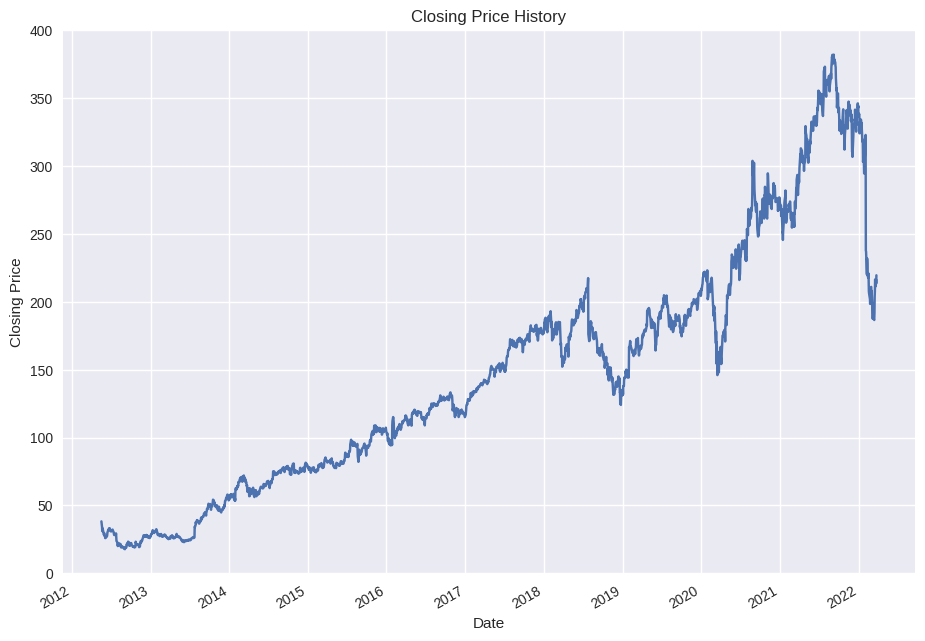

In [103]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

menampilkan grafik dari setiap kolom yang ada pada dataframe. hal tersebut memudahkan dalam membandingkan dan memvisualisasikan data dari berbagai kolom dalam DataFrame.

<Figure size 1600x800 with 0 Axes>

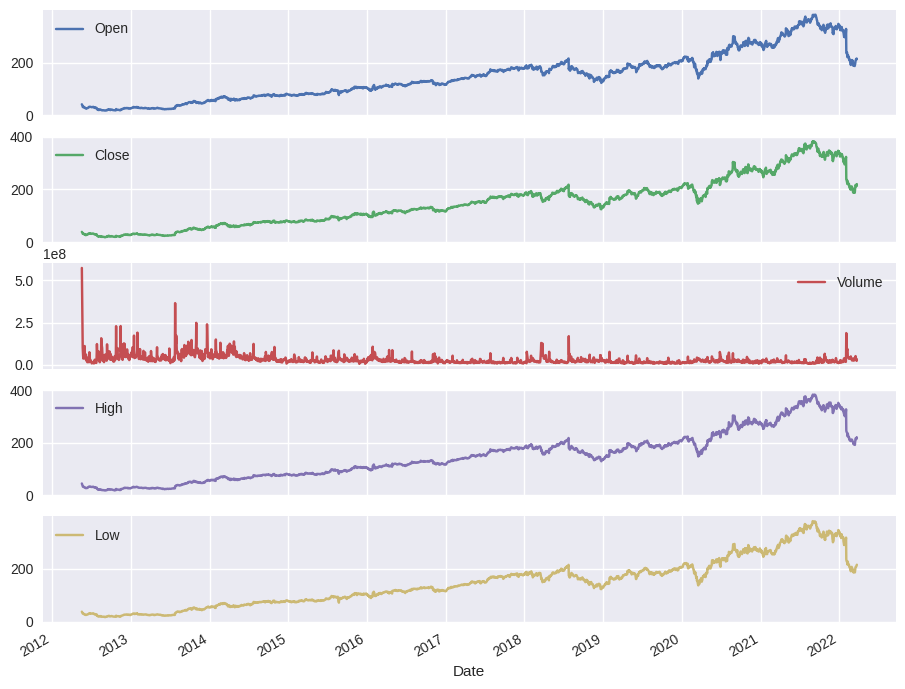

In [104]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

menambahkan dua kolom baru ke dalam DataFrame yang berisi informasi persentase perubahan harga saham.

In [105]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

setelah dibuat, menginput kolom tersebut kedalam dataframe

In [106]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

melakukan langkah-langkah awal dalam membuat model forecasting menggunakan machine learning

In [107]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

124


<ipython-input-107-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


mengimpor beberapa modul dan fungsi dari library scikit-learn (sklearn) yang digunakan dalam proses pemodelan dan evaluasi.

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

melakukan penskalaan fitur (feature scaling) pada data menggunakan objek StandardScaler dari sklearn

In [109]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-109-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


membagi menjadi dua bagian: X_Predictions yang berisi data yang akan diprediksi, dan X yang berisi data yang akan dilatih (membangun) model. Data yang akan diprediksi berada pada bagian terakhir dari dataset

In [110]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

memastikan data yang digunakan dalam pembuatan model tidak mengandung nilai yang hilang dan bahwa variabel target telah disiapkan dalam bentuk array NumPy yang sesuai untuk proses

In [111]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-111-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


membagi dataset menjadi subset pelatihan (training set) dan subset pengujian (testing set) menggunakan fungsi train_test_split dari scikit-learn.

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

melakukan pelatihan (fitting) model regresi linear menggunakan LinearRegression dan mengukur tingkat kepercayaan (confidence) model terhadap data pengujian

In [113]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

menyimpan tingkat kepercayaan (confidence) model regresi linear terhadap data pengujian. Skor kepercayaan ini dihitung menggunakan metode score() pada objek LinearRegression setelah model dilatih dengan data pelatihan dan diuji dengan data pengujian.



In [114]:
lr_confidence

0.8617312832362729

melakukan pelatihan (fitting) model regresi acak (Random Forest Regression) menggunakan RandomForestRegressor dan mengukur tingkat kepercayaan (confidence) model terhadap data pengujian

In [115]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

 menyimpan tingkat kepercayaan (confidence) model regresi acak (Random Forest Regression) terhadap data pengujian

In [116]:
rf_confidence

0.9483287431175875

 melakukan prediksi dan menambahkan hasil prediksi ke dalam DataFrame df

In [117]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-117-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-117-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-117-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(

membuat plot visualisasi harga penutupan historis ('Adj Close') dan prediksi ('Forecast') dalam DataFrame df

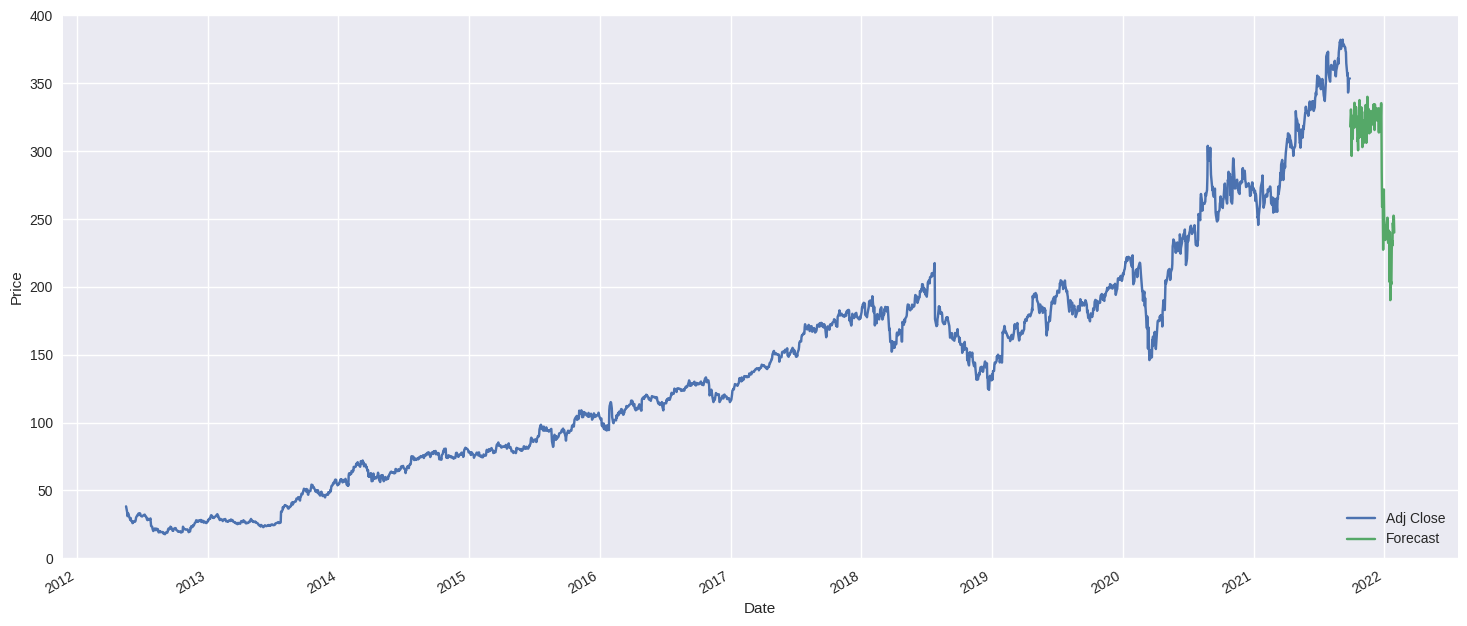

In [118]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()